# Data Analysis and Prediction using Linear Regression Module

## 1. Import Library

In [1]:
# Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Add Dataset and Segregate Dataset for each Variant

In [2]:
# Read CSV for all dataset
datacovid = pd.read_csv('datasetcovidsamplejkt.csv')
datacovid.columns

Index(['Tanggal', 'Variant_Suspect', 'Day', 'ID_DAILY_POSITIVE',
       'ID_DAILY_HOSPITALIZED', 'ID_DAILY_CURED', 'ID_DAILY_DEATH',
       'JKT_DAILY_DEATH', 'JKT_DAILY_CURED', 'JKT_DAILY_ISOLATION',
       'JKT_DAILY_HOSPITALIZED', 'JKT_DAILY_POSITIVE',
       'JKT_DAILY_TESTSPECIMENT', 'JKT_DAILY_POSTEST', 'JKT_DAILY_POSTRATE',
       'JKT_CONS_VALUE', 'CoF_HSE', 'PoF_Spec_X_PostRate', 'Risk',
       'Risk_Criteria'],
      dtype='object')

In [3]:
# Select important dataset only for analysis and prediction

covid_JKT = datacovid.loc[:,['Variant_Suspect','Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','Risk']]

covid_Delta = datacovid.loc[datacovid.Variant_Suspect=='Delta',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','Risk','Risk_Criteria']]
covid_Omicron = datacovid.loc[datacovid.Variant_Suspect=='Omicron',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','Risk','Risk_Criteria']]

## 3. Refresh Data Correlation

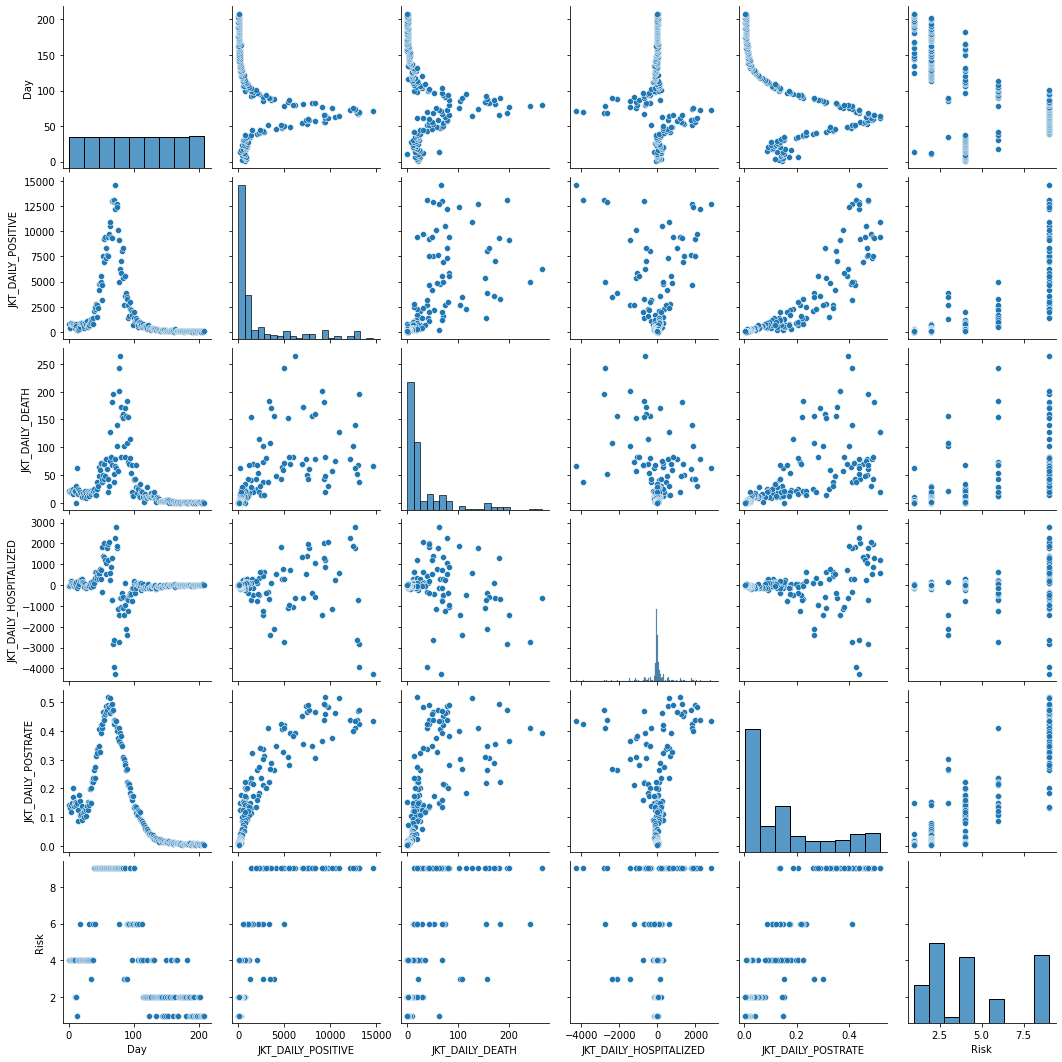

In [4]:
# Review again correlation between each data for variant delta
sns.pairplot(covid_Delta)

## 4. Linear Regression Analysis

### 4.1 Single Variable Prediction between Daily Positive and Positivity Rate

In [5]:
# Import Library for Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Declaration test train split for supervise learning
# from pairplot above, we can see that correlation between postivity rate may have linear correlation with positive number.
X_train, X_test, y_train, y_test = train_test_split(covid_Delta.JKT_DAILY_POSTRATE, covid_Delta.JKT_DAILY_POSITIVE)

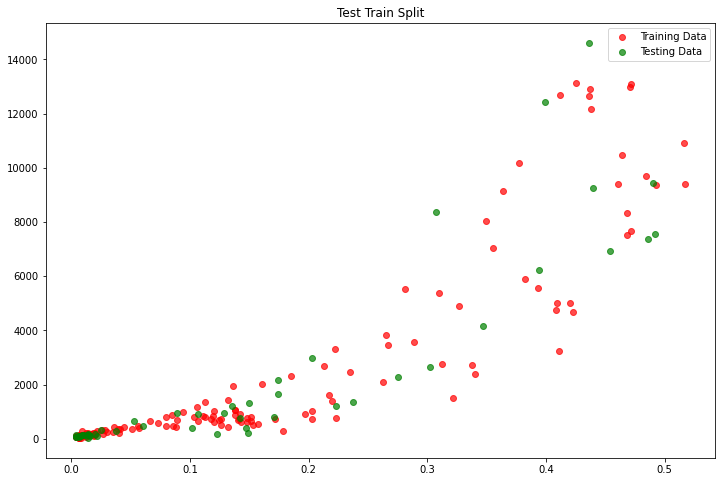

In [6]:
# Test train split visualization
plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, label='Training Data', color='r',alpha=0.7)
plt.scatter(X_test, y_test, label='Testing Data', color='g',alpha=0.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [19]:
# Model fitting using Linear Regression Module
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

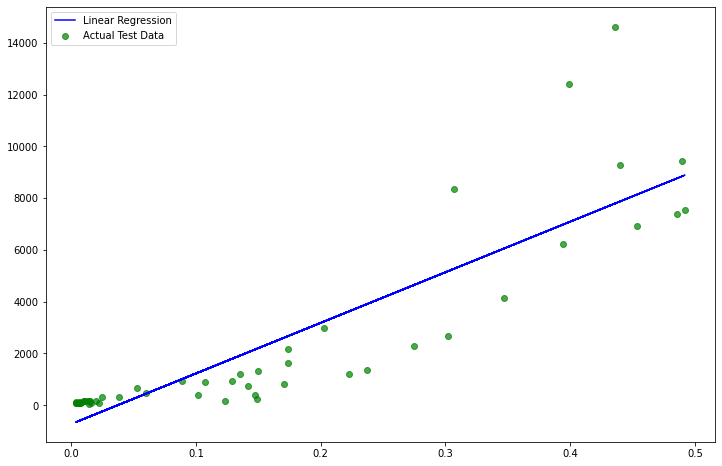

In [8]:
# Use model to predict on test data
prediction = LR.predict(X_test.values.reshape(-1,1))

# Plot prediction line against actual test data
plt.figure(figsize=(12,8))
plt.plot(X_test, prediction, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=0.7)
plt.legend()
plt.show()

In [9]:
#find parameter for Linear Regression

lrcoef = LR.coef_

lrint = LR.intercept_

print("LR Coefficient: ",lrcoef)
print("LR Intercept: ", lrint)

LR Coefficient:  [19536.04835503]
LR Intercept:  -725.3901746094407


In [10]:
#daily_positive_predict = LR.intercept_ + LR.coef_*(daily_postrate)

daily_postrate = 0.4

daily_positive_predict = lrint + lrcoef*daily_postrate

daily_positive_predict

array([7089.0291674])

In [11]:
# direct predict estimated daily_positive_predict using predict

LR.predict(np.array([[0.4]]))[0]

7089.029167403953

### 4.2 Polynomial Features 

reference: https://data36.com/polynomial-regression-python-scikit-learn/

In [18]:
#Start Polynomial Features

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

In [13]:
# Creating new features

poly_features = poly.fit_transform(X_train.values.reshape(-1,1))

In [14]:
# Creating the polynomial regression model

poly_reg_model = LinearRegression()
poly_reg_model

LinearRegression()

In [15]:
# Fit model
poly_reg_model.fit(poly_features, y_train)

LinearRegression()

In [16]:
y_predicted = poly_reg_model.predict(poly_features)

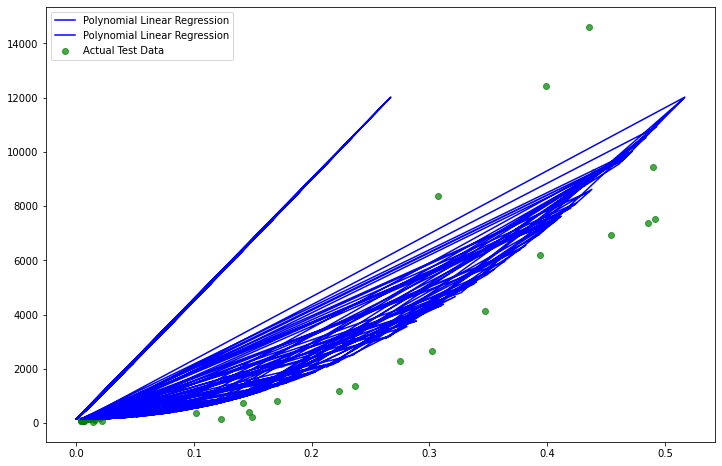

In [17]:
plt.figure(figsize=(12,8))
plt.plot(poly_features, y_predicted, label='Polynomial Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=0.7)
plt.legend()
plt.show()